In [1]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
import joblib
import pandas as pd
warnings.filterwarnings("ignore")

model_directory = "../08_model_build/model"

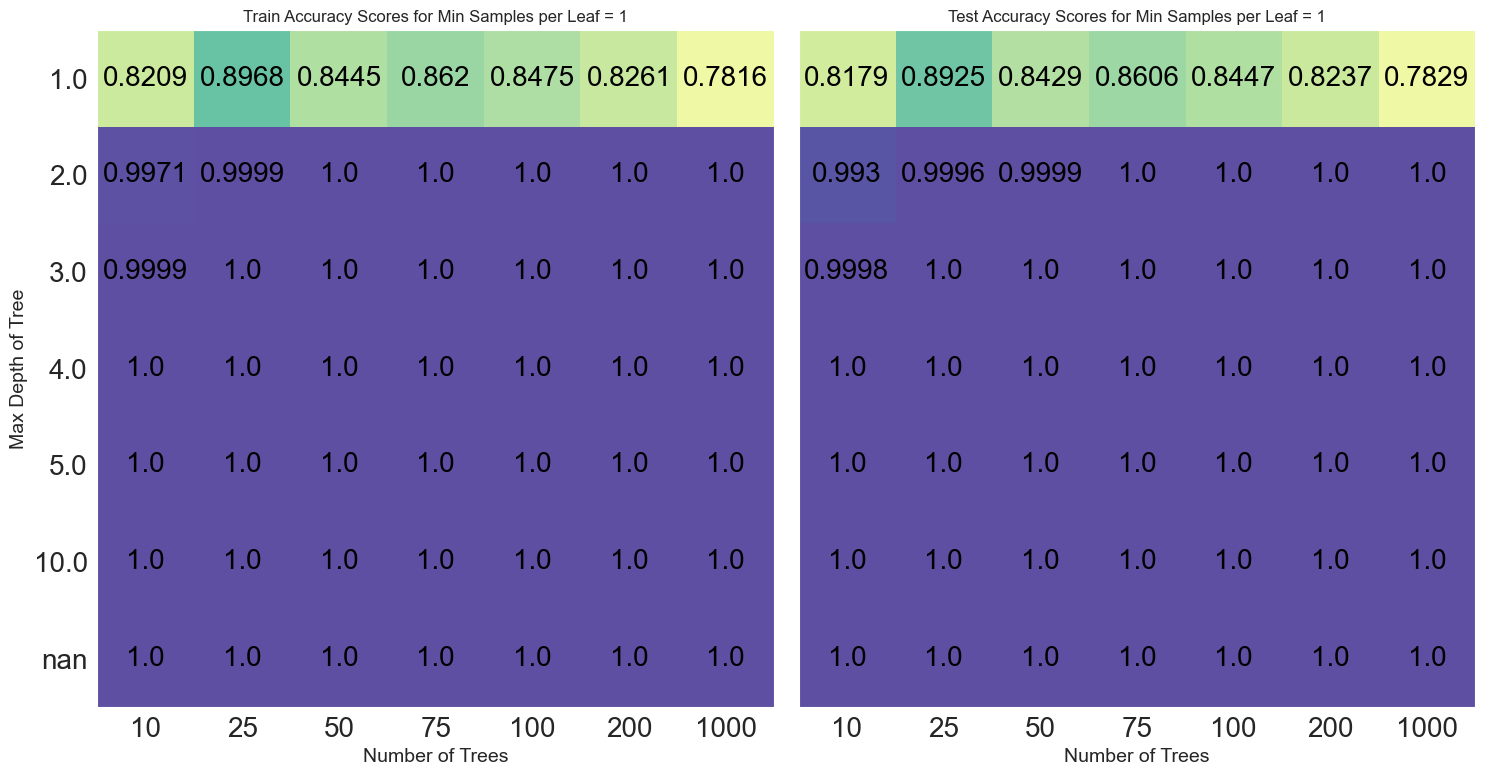

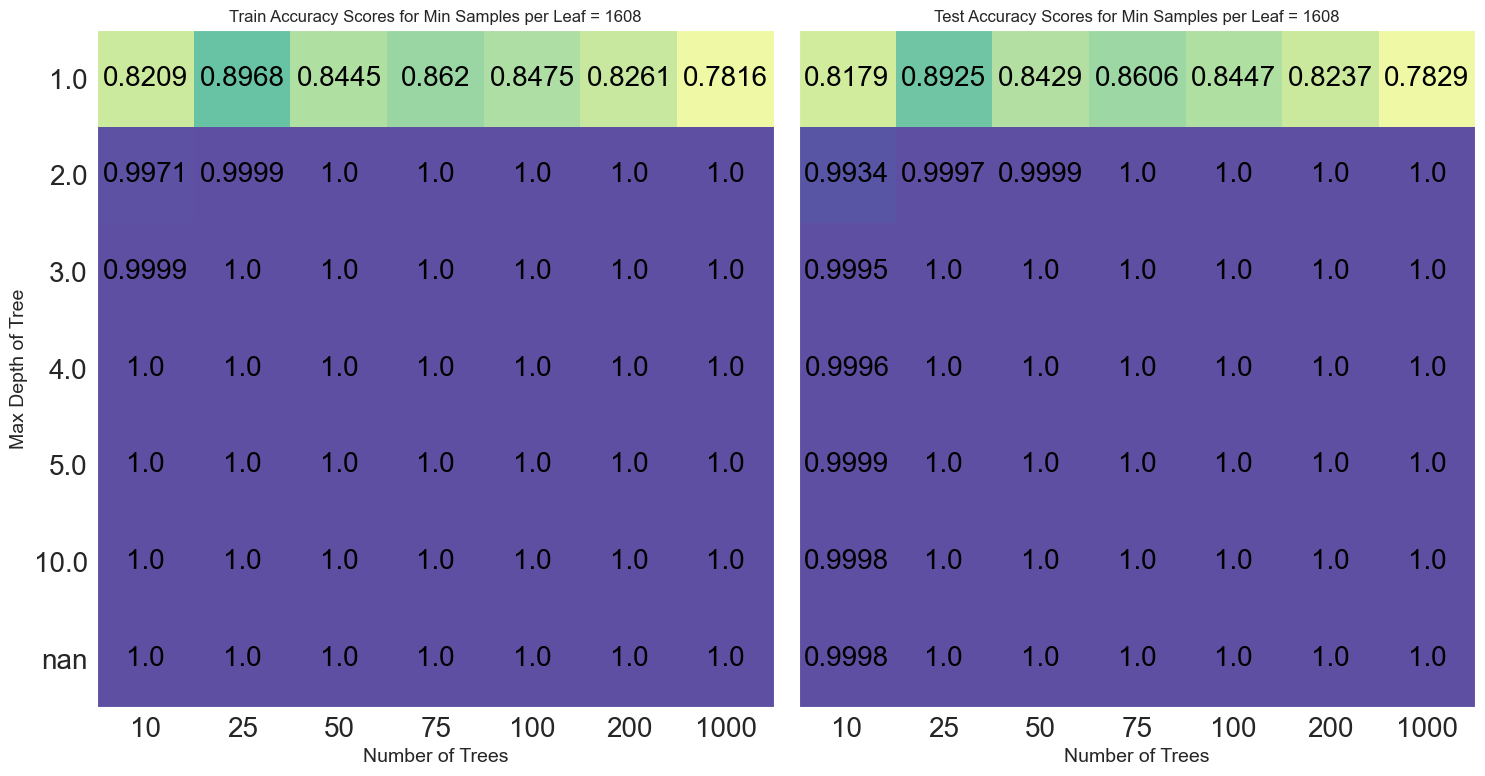

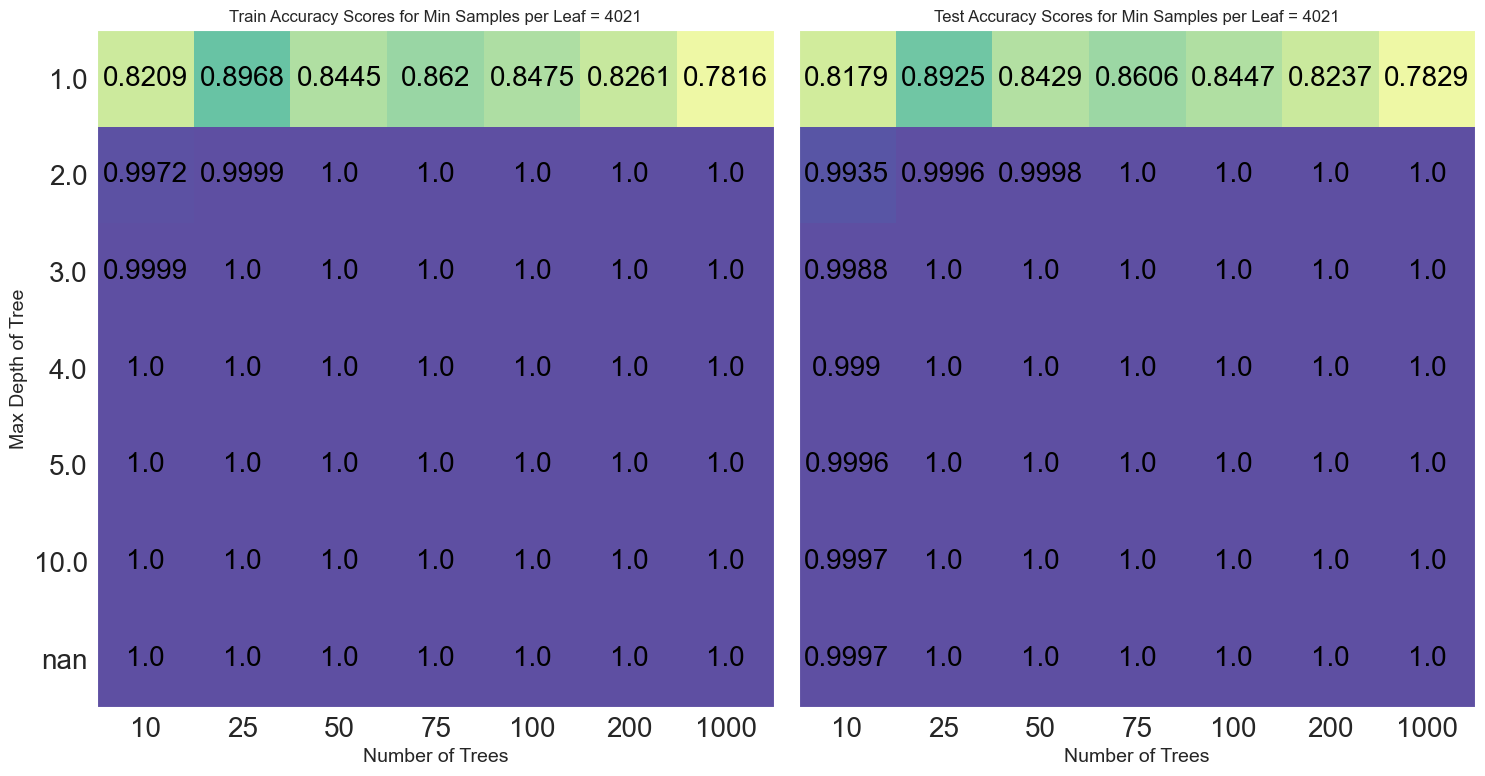

In [2]:
# THIS IS ONLY USED TO PLOT THE GRID SEARCH RESULTS

# Grid search results - read as df
gridSearch1 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_stratified_0.pkl').cv_results_)[["param_rf__min_samples_leaf","param_rf__max_depth","param_rf__n_estimators", "mean_train_score", "mean_test_score"]]
gridSearch2 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_stratified_1.pkl').cv_results_)[["param_rf__min_samples_leaf","param_rf__max_depth","param_rf__n_estimators", "mean_train_score", "mean_test_score"]]
gridSearch3 = pd.DataFrame(joblib.load(f'{model_directory}/gridsearch_final_stratified_2.pkl').cv_results_)[["param_rf__min_samples_leaf","param_rf__max_depth","param_rf__n_estimators", "mean_train_score", "mean_test_score"]]

# Store the average over folds and iterations
gridSearchAvg = pd.DataFrame()

# Values of parameters are constant between iterations 
gridSearchAvg["param_rf__min_samples_leaf"] = gridSearch1["param_rf__min_samples_leaf"]
gridSearchAvg["param_rf__max_depth"] = gridSearch1["param_rf__max_depth"]
gridSearchAvg["param_rf__n_estimators"] = gridSearch1["param_rf__n_estimators"]

# Average over the three iterations for the mean train and test scores
gridSearchAvg["mean_train_score"] = (gridSearch1["mean_train_score"] + gridSearch2["mean_train_score"] + gridSearch3["mean_train_score"])/3
gridSearchAvg["mean_test_score"] = (gridSearch1["mean_test_score"] + gridSearch2["mean_test_score"] + gridSearch3["mean_test_score"])/3

#####
# PLOT WHEN MIN SAMPLES LEAF = 1
#####
gridSearchdf2 = gridSearchAvg[gridSearchAvg["param_rf__min_samples_leaf"] ==1]
fig, ax = plt.subplots(1,2,sharey=True,figsize=(15,10))
XLABEL = "Max Depth of Tree"
YLABEL = "Number of Trees"
XAXIS = np.unique(np.array(gridSearchdf2["param_rf__max_depth"]))
YAXIS = np.unique(np.array(gridSearchdf2["param_rf__n_estimators"]))
for iter in range(2):
    if iter == 0:
        ZAXIS = np.array(gridSearchdf2["mean_train_score"]).reshape(len(XAXIS), len(YAXIS))
        ax[iter].set_title(f"Train Accuracy Scores for Min Samples per Leaf = 1")
        ax[iter].set_ylabel(XLABEL, fontsize=14)
    if iter == 1:
        ZAXIS = np.array(gridSearchdf2["mean_test_score"]).reshape(len(XAXIS), len(YAXIS))
        ax[iter].set_title(f"Test Accuracy Scores for Min Samples per Leaf = 1")
    ax[iter].imshow(ZAXIS, vmin=0.5, vmax=1, cmap='Spectral')
    
    # Show all ticks and label them with the respective list entries
    ax[iter].set_yticks(np.arange(len(XAXIS)), labels=XAXIS, fontsize=20)
    ax[iter].set_xticks(np.arange(len(YAXIS)), labels=YAXIS, fontsize=20)
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(XAXIS)):
        for j in range(len(YAXIS)):
            text = ax[iter].text(j, i, np.round(ZAXIS[i, j],4),ha="center", va="center", color="black", fontsize=20)
    ax[iter].grid(None)
    ax[iter].set_xlabel(YLABEL, fontsize=14)
fig.tight_layout()
plt.savefig(f"plots/gridsearchresults_leaf1.jpg", dpi=400)

#####
# PLOT WHEN MIN SAMPLES LEAF = 1608
#####
gridSearchdf2 = gridSearchAvg[gridSearchAvg["param_rf__min_samples_leaf"] == 1608]
fig, ax = plt.subplots(1,2,sharey=True,figsize=(15,10))
XAXIS = np.unique(np.array(gridSearchdf2["param_rf__max_depth"]))
YAXIS = np.unique(np.array(gridSearchdf2["param_rf__n_estimators"]))
for iter in range(2):
    if iter == 0:
        ZAXIS = np.array(gridSearchdf2["mean_train_score"]).reshape(len(XAXIS), len(YAXIS))
        ax[iter].set_title(f"Train Accuracy Scores for Min Samples per Leaf = 1608")
        ax[iter].set_ylabel(XLABEL, fontsize=14)
    if iter == 1:
        ZAXIS = np.array(gridSearchdf2["mean_test_score"]).reshape(len(XAXIS), len(YAXIS))
        ax[iter].set_title(f"Test Accuracy Scores for Min Samples per Leaf = 1608")
    ax[iter].imshow(ZAXIS, vmin=0.5, vmax=1, cmap='Spectral')
    
    # Show all ticks and label them with the respective list entries
    ax[iter].set_yticks(np.arange(len(XAXIS)), labels=XAXIS, fontsize=20)
    ax[iter].set_xticks(np.arange(len(YAXIS)), labels=YAXIS, fontsize=20)
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(XAXIS)):
        for j in range(len(YAXIS)):
            text = ax[iter].text(j, i, np.round(ZAXIS[i, j],4),ha="center", va="center", color="black", fontsize=20)
    ax[iter].grid(None)
    ax[iter].set_xlabel(YLABEL, fontsize=14)
fig.tight_layout()
plt.savefig(f"plots/gridsearchresults_leaf1608.jpg", dpi=400)

#####
# PLOT WHEN MIN SAMPLES LEAF = 4021
#####
gridSearchdf2 = gridSearchAvg[gridSearchAvg["param_rf__min_samples_leaf"] == 4021]
fig, ax = plt.subplots(1,2,sharey=True,figsize=(15,10))
XAXIS = np.unique(np.array(gridSearchdf2["param_rf__max_depth"]))
YAXIS = np.unique(np.array(gridSearchdf2["param_rf__n_estimators"]))
for iter in range(2):
    if iter == 0:
        ZAXIS = np.array(gridSearchdf2["mean_train_score"]).reshape(len(XAXIS), len(YAXIS))
        ax[iter].set_title(f"Train Accuracy Scores for Min Samples per Leaf = 4021")
        ax[iter].set_ylabel(XLABEL, fontsize=14)
    if iter == 1:
        ZAXIS = np.array(gridSearchdf2["mean_test_score"]).reshape(len(XAXIS), len(YAXIS))
        ax[iter].set_title(f"Test Accuracy Scores for Min Samples per Leaf = 4021")
    ax[iter].imshow(ZAXIS, vmin=0.5, vmax=1, cmap='Spectral')
    
    # Show all ticks and label them with the respective list entries
    ax[iter].set_yticks(np.arange(len(XAXIS)), labels=XAXIS, fontsize=20)
    ax[iter].set_xticks(np.arange(len(YAXIS)), labels=YAXIS, fontsize=20)
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(XAXIS)):
        for j in range(len(YAXIS)):
            text = ax[iter].text(j, i, np.round(ZAXIS[i, j],4),ha="center", va="center", color="black", fontsize=20)
    ax[iter].grid(None)
    ax[iter].set_xlabel(YLABEL, fontsize=14)
fig.tight_layout()
plt.savefig(f"plots/gridsearchresults_leaf4021.jpg", dpi=400)
